# **Brain Tumor Diagnosis - type classification**
### **Abdallah Fekry**
**Model 10**

---

class 0 = glioma_tumor

class 1 = meningioma_tumor

class 2 = no_tumor

class 3 = pituitary_tumor

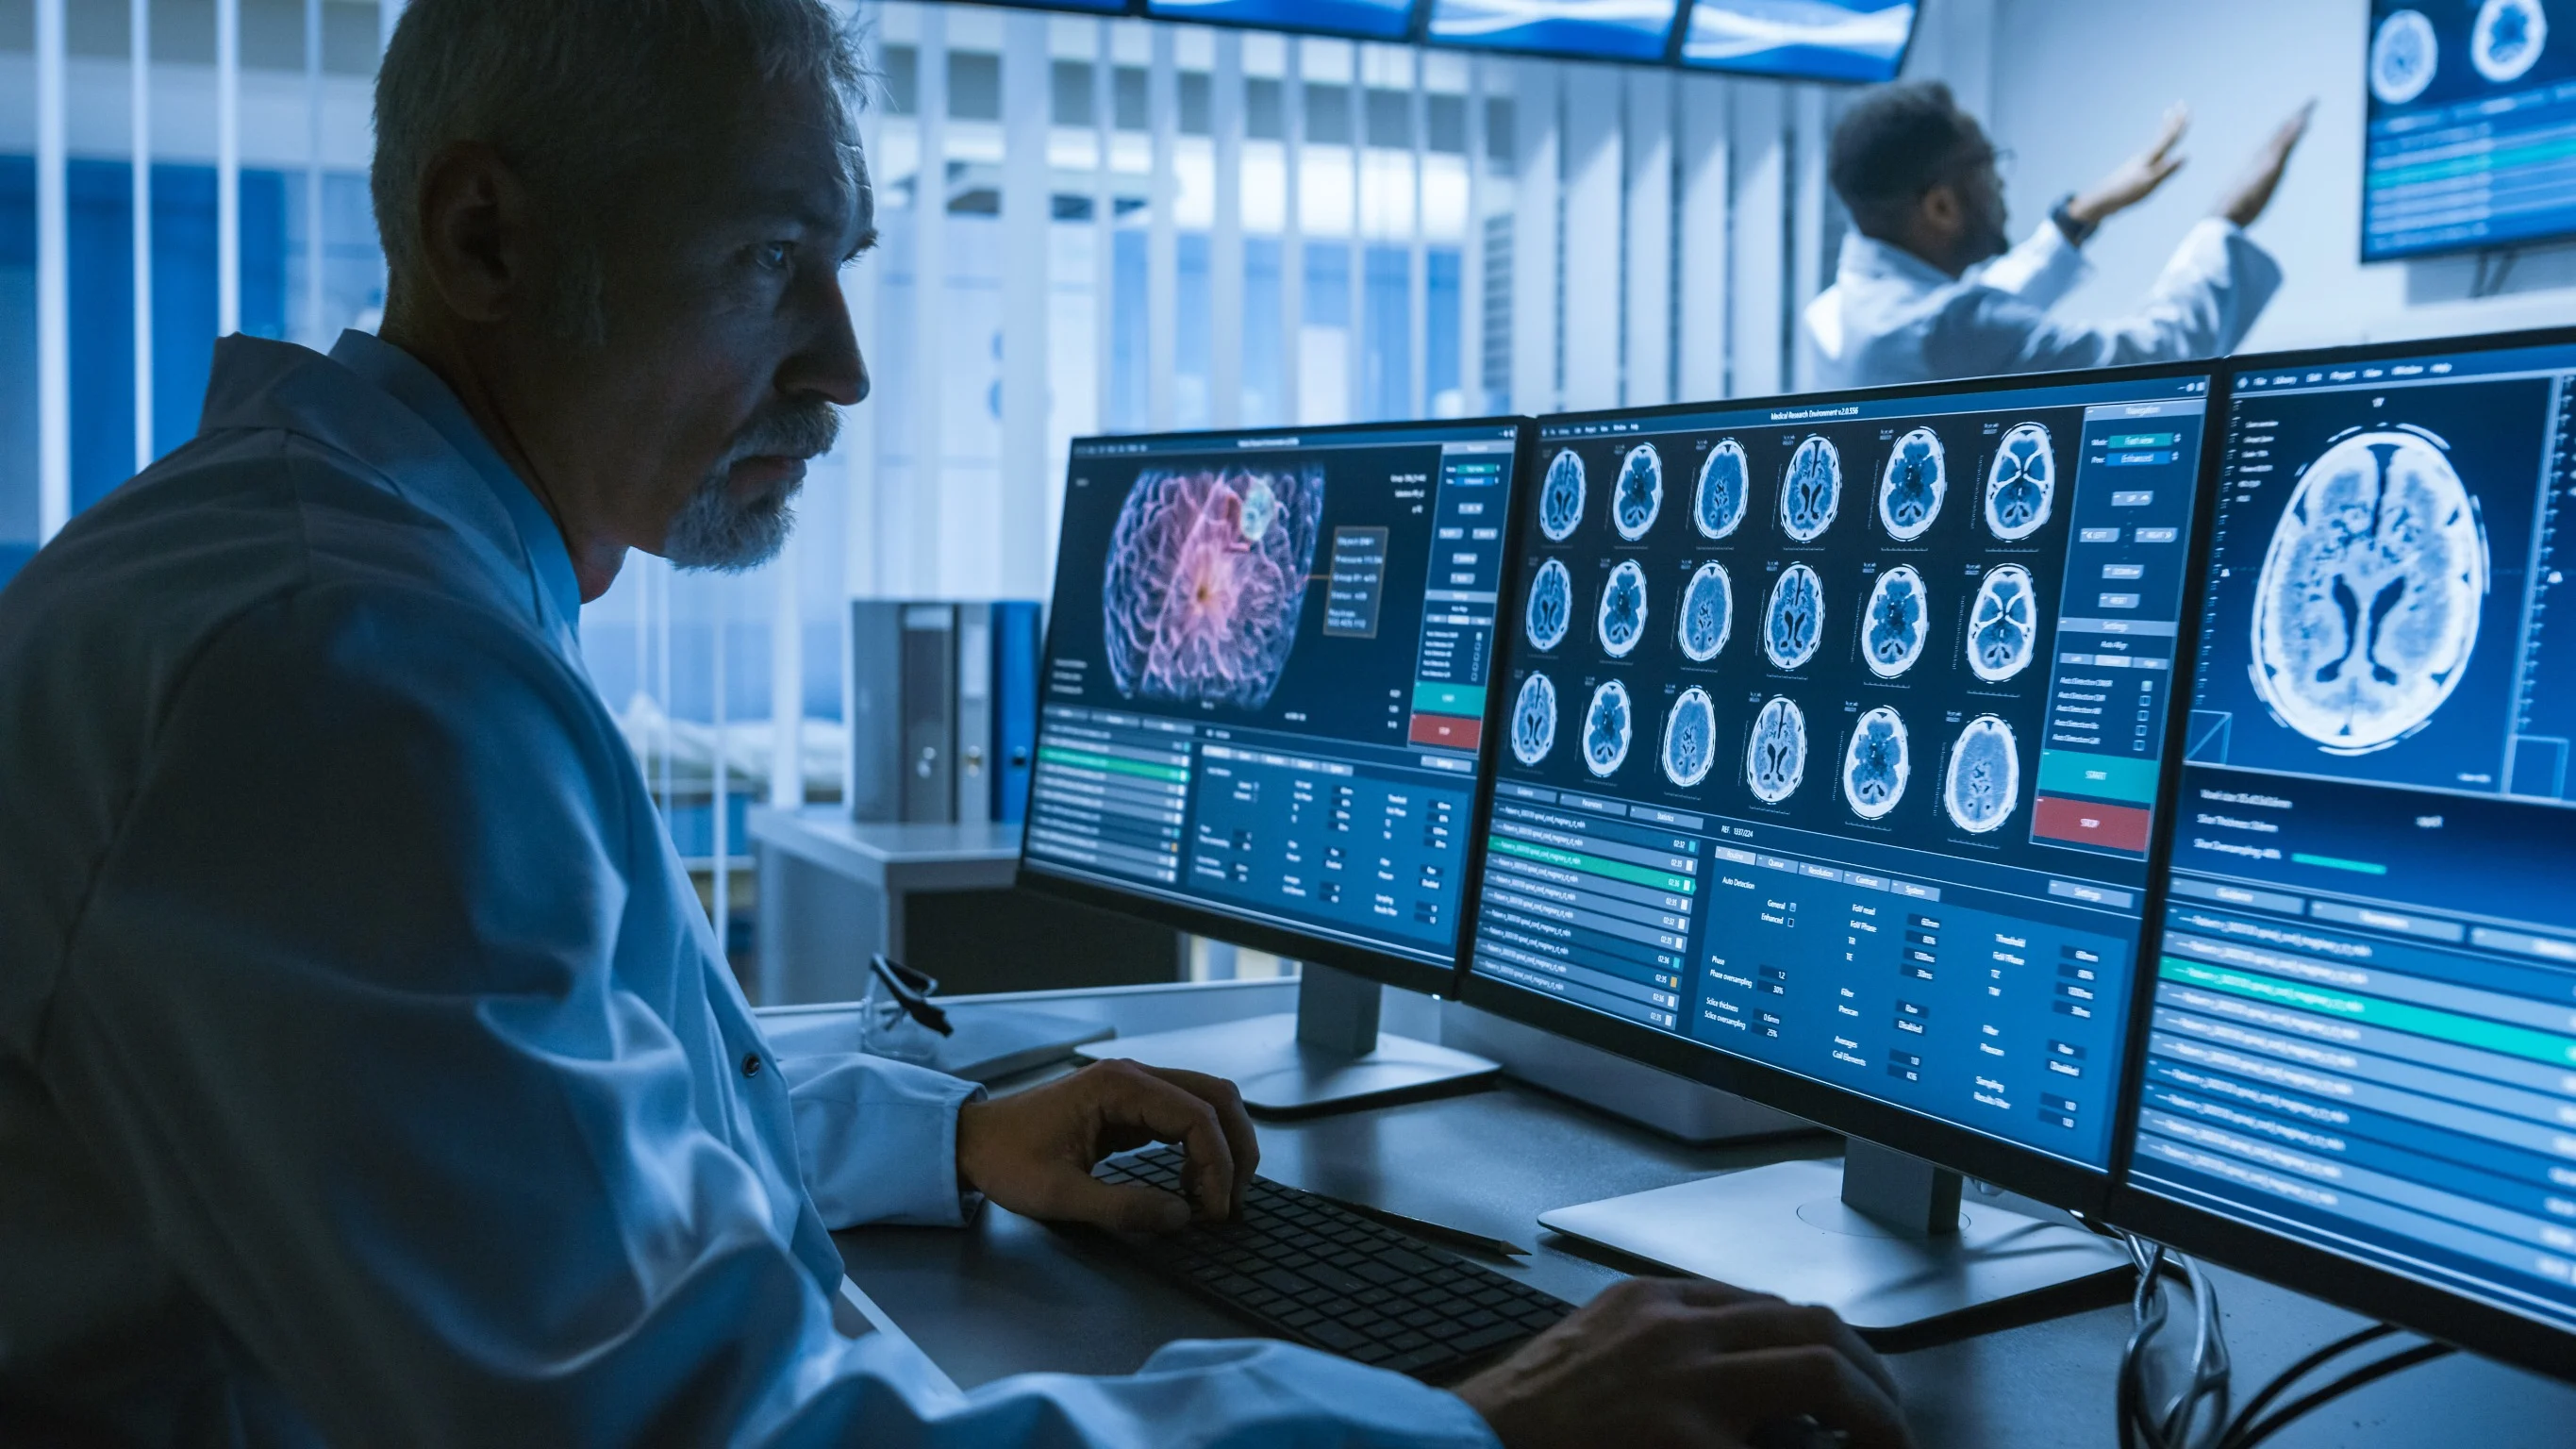

In [1]:
!pip install keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:
import keras
keras.__version__

'2.15.0'

In [5]:
classes = {0 : 'glioma_tumor',
           1 : 'meningioma_tumor',
           2 : 'normal no_tumor',
           3 : 'pituitary_tumor'}

In [6]:
classes[0]

'glioma_tumor'

importing libraries

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/kaggle/input/brain-tumor-classification/brain_tumor/Data/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True)
test_data = train_datagen.flow_from_directory('/kaggle/input/brain-tumor-classification/brain_tumor/Data/Test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 21587 images belonging to 4 classes.
Found 697 images belonging to 4 classes.


In [12]:
train_data.image_shape

(224, 224, 3)

In [13]:
np.unique(test_data.labels)

array([0, 1, 2, 3], dtype=int32)

In [14]:
train_data.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'normal': 2, 'pituitary_tumor': 3}

In [15]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [16]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 16388     
                                                                 
Total params: 134276932 (512.23 MB)
Trainable params: 11

In [18]:
len(train_data.labels)

21587

In [19]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

results = model.fit(train_data, epochs=100, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)
                  )

Epoch 1/100


I0000 00:00:1709722461.940950     128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


675/675 [==============================] - 163s 221ms/step - loss: 0.6884 - accuracy: 0.8143 - val_loss: 0.2994 - val_accuracy: 0.8924
Epoch 2/100
675/675 [==============================] - 108s 159ms/step - loss: 0.2279 - accuracy: 0.9156 - val_loss: 0.2638 - val_accuracy: 0.8981
Epoch 3/100
675/675 [==============================] - 108s 159ms/step - loss: 0.1576 - accuracy: 0.9427 - val_loss: 0.3110 - val_accuracy: 0.9154
Epoch 4/100
675/675 [==============================] - 108s 159ms/step - loss: 0.1218 - accuracy: 0.9541 - val_loss: 0.2498 - val_accuracy: 0.9254
Epoch 5/100
675/675 [==============================] - 107s 158ms/step - loss: 0.0937 - accuracy: 0.9664 - val_loss: 0.3640 - val_accuracy: 0.9125
Epoch 6/100
675/675 [==============================] - 107s 158ms/step - loss: 0.0794 - accuracy: 0.9699 - val_loss: 0.4749 - val_accuracy: 0.8824
Epoch 7/100
675/675 [==============================] - 107s 158ms/step - loss: 0.0760 - accuracy: 0.9724 - val_loss: 0.3411 - val_

In [20]:
loss, acc = model.evaluate(test_data)

22/22 [==============================] - 3s 126ms/step - loss: 0.1240 - accuracy: 0.9641


In [21]:
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss ,sep='')

Test accuracy = 96.41%
Loss = 0.12395264208316803


In [22]:
results.history['val_loss']

[0.2994413673877716,
 0.2637791335582733,
 0.31102123856544495,
 0.2498389333486557,
 0.36400720477104187,
 0.4749460220336914,
 0.3411124050617218,
 0.2253119945526123,
 0.12395264208316803,
 0.146945059299469,
 0.46311914920806885,
 0.22908635437488556,
 0.2706007957458496,
 0.2363446056842804]

In [23]:
results.history['val_accuracy']

[0.8923959732055664,
 0.8981348872184753,
 0.9153515100479126,
 0.9253945350646973,
 0.9124820828437805,
 0.8823529481887817,
 0.8852223753929138,
 0.9296987056732178,
 0.9641320109367371,
 0.952654242515564,
 0.8866571187973022,
 0.9354375600814819,
 0.9411764740943909,
 0.9497848153114319]

In [24]:
i = results.history['val_loss'].index(loss)
i

8

In [25]:
results.history['val_accuracy'][i]

0.9641320109367371

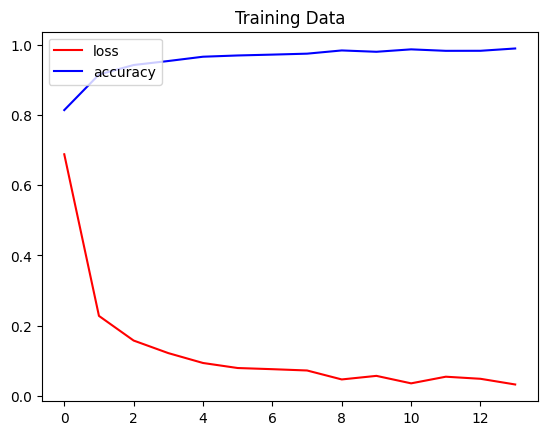

In [26]:
fig = plt.figure()
plt.plot(results.history['loss'], c='red', label='loss')
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
plt.title("Training Data")
plt.legend(loc="upper left")
plt.show()

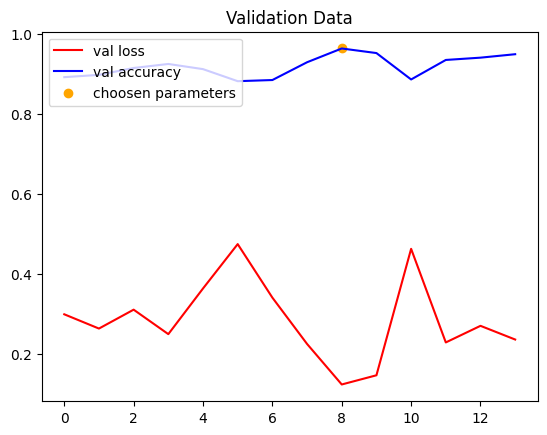

In [27]:
fig = plt.figure()
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.scatter(i ,results.history['val_accuracy'][i], c='orange', label='choosen parameters', marker='o')
plt.title("Validation Data")
plt.legend(loc="upper left")
plt.show()

In [28]:
model.save("model8.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
yp = model.predict(test_data)
yp

22/22 [==============================] - 3s 131ms/step


array([[9.9989128e-01, 1.0712106e-04, 6.8100678e-07, 8.4820414e-07],
       [9.9962473e-01, 3.5447374e-04, 1.3090156e-05, 7.6113924e-06],
       [1.0000000e+00, 4.2974113e-09, 4.1517692e-11, 2.1143429e-13],
       ...,
       [6.6826419e-11, 2.5545910e-09, 1.7565277e-08, 1.0000000e+00],
       [4.0531575e-11, 2.3904668e-11, 9.4199426e-10, 1.0000000e+00],
       [3.6254422e-13, 1.4898508e-11, 9.1796376e-11, 1.0000000e+00]],
      dtype=float32)

In [30]:
yp = yp.argmax(axis=1)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [31]:
yp.shape

(697,)

Meningioma_tumor Sample


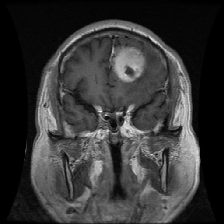

In [32]:
print("Meningioma_tumor Sample")
m = load_img('/kaggle/input/brain-tumor-classification/brain_tumor/Data/Test/meningioma_tumor/M_554.jpg',target_size=(224,224))
# plt.imshow()
m

Golima_tumor Sample


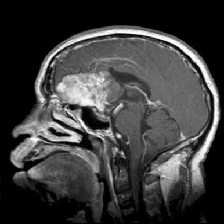

In [33]:
print("Golima_tumor Sample")
g = load_img('/kaggle/input/brain-tumor-classification/brain_tumor/Data/Test/glioma_tumor/G_1.jpg',target_size=(224,224))
# plt.imshow()
g

No tumor Sample


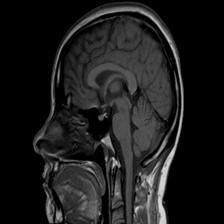

In [34]:
print('No tumor Sample')
n = load_img('/kaggle/input/brain-tumor-classification/brain_tumor/Data/Test/normal/N_173_DA_.jpg',target_size=(224,224))
# plt.imshow(img_normal)
n

Pituitary_tumor Sample


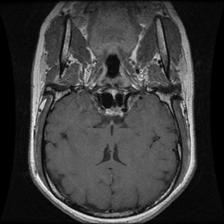

In [35]:
print('Pituitary_tumor Sample')
p = load_img('/kaggle/input/brain-tumor-classification/brain_tumor/Data/Test/pituitary_tumor/P_391_VF_.jpg',target_size=(224,224))
# plt.imshow(img_normal)
p

Text(0.5, 1.0, 'Pituitary_tumor')

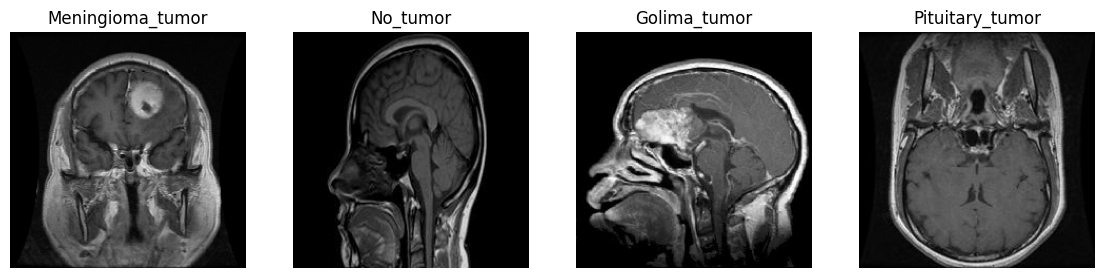

In [36]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 4, 1)
plt.axis('off')
plt.imshow(m)
plt.title('Meningioma_tumor')
# _______________________________
fig.add_subplot(1, 4, 2)
plt.axis('off')
plt.imshow(n)
plt.title('No_tumor')
# _______________________________
fig.add_subplot(1, 4, 3)
plt.axis('off')
plt.imshow(g)
plt.title('Golima_tumor')
# _______________________________
fig.add_subplot(1, 4, 4)
plt.axis('off')
plt.imshow(p)
plt.title('Pituitary_tumor')

In [37]:
m = img_to_array(m)
n = img_to_array(n)
p = img_to_array(p)
g = img_to_array(g)
m = m/255
n = n/255
g = g/255
p = p/255
m = m.reshape(1,224,224,3)
n = n.reshape(1,224,224,3)
g = g.reshape(1,224,224,3)
p = p.reshape(1,224,224,3)
m.shape

(1, 224, 224, 3)

In [38]:
p1 = model.predict(m).argmax()

print("Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 1s 1s/step
Class 1: meningioma_tumor


In [39]:
p1 = model.predict(n).argmax()

print("Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 20ms/step
Class 2: normal no_tumor


In [40]:
p1 = model.predict(p).argmax()

print("Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 20ms/step
Class 3: pituitary_tumor


In [41]:
p1 = model.predict(g).argmax()

print("Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 19ms/step
Class 0: glioma_tumor


In [42]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,glioma_tumor/G_1.jpg,0,0
1,glioma_tumor/G_10.jpg,0,0
2,glioma_tumor/G_100.jpg,0,0
3,glioma_tumor/G_101.jpg,0,0
4,glioma_tumor/G_101_BR_.jpg,0,0
...,...,...,...
692,pituitary_tumor/P_99_DA_.jpg,3,3
693,pituitary_tumor/P_99_VF_.jpg,3,3
694,pituitary_tumor/P_9_RO_.jpg,3,3
695,pituitary_tumor/P_9_SP_.jpg,3,3


In [43]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [44]:
m = confusion_matrix(test_data.labels,yp)
m

array([[175,   1,   2,   0],
       [ 10, 119,   1,   2],
       [  7,   0, 232,   0],
       [  0,   0,   2, 146]])

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

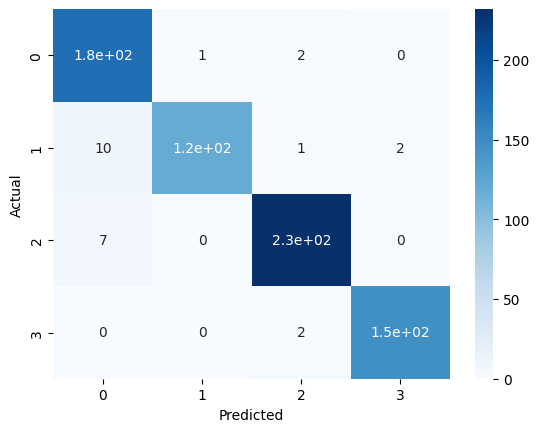

In [45]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

---

In [ ]:
model.save('model8.h5')

In [46]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'model8.h5')

/kaggle/working


/kaggle/working/model8.h5